In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files, drive

In [ ]:
sns.set()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Studia/DS/Sem2/AML/Project2/Data'

In [ ]:
X = np.loadtxt(data_path+'/x_train.txt')
y = np.loadtxt(data_path+'/y_train.txt')
test = np.loadtxt(data_path+'/x_test.txt')

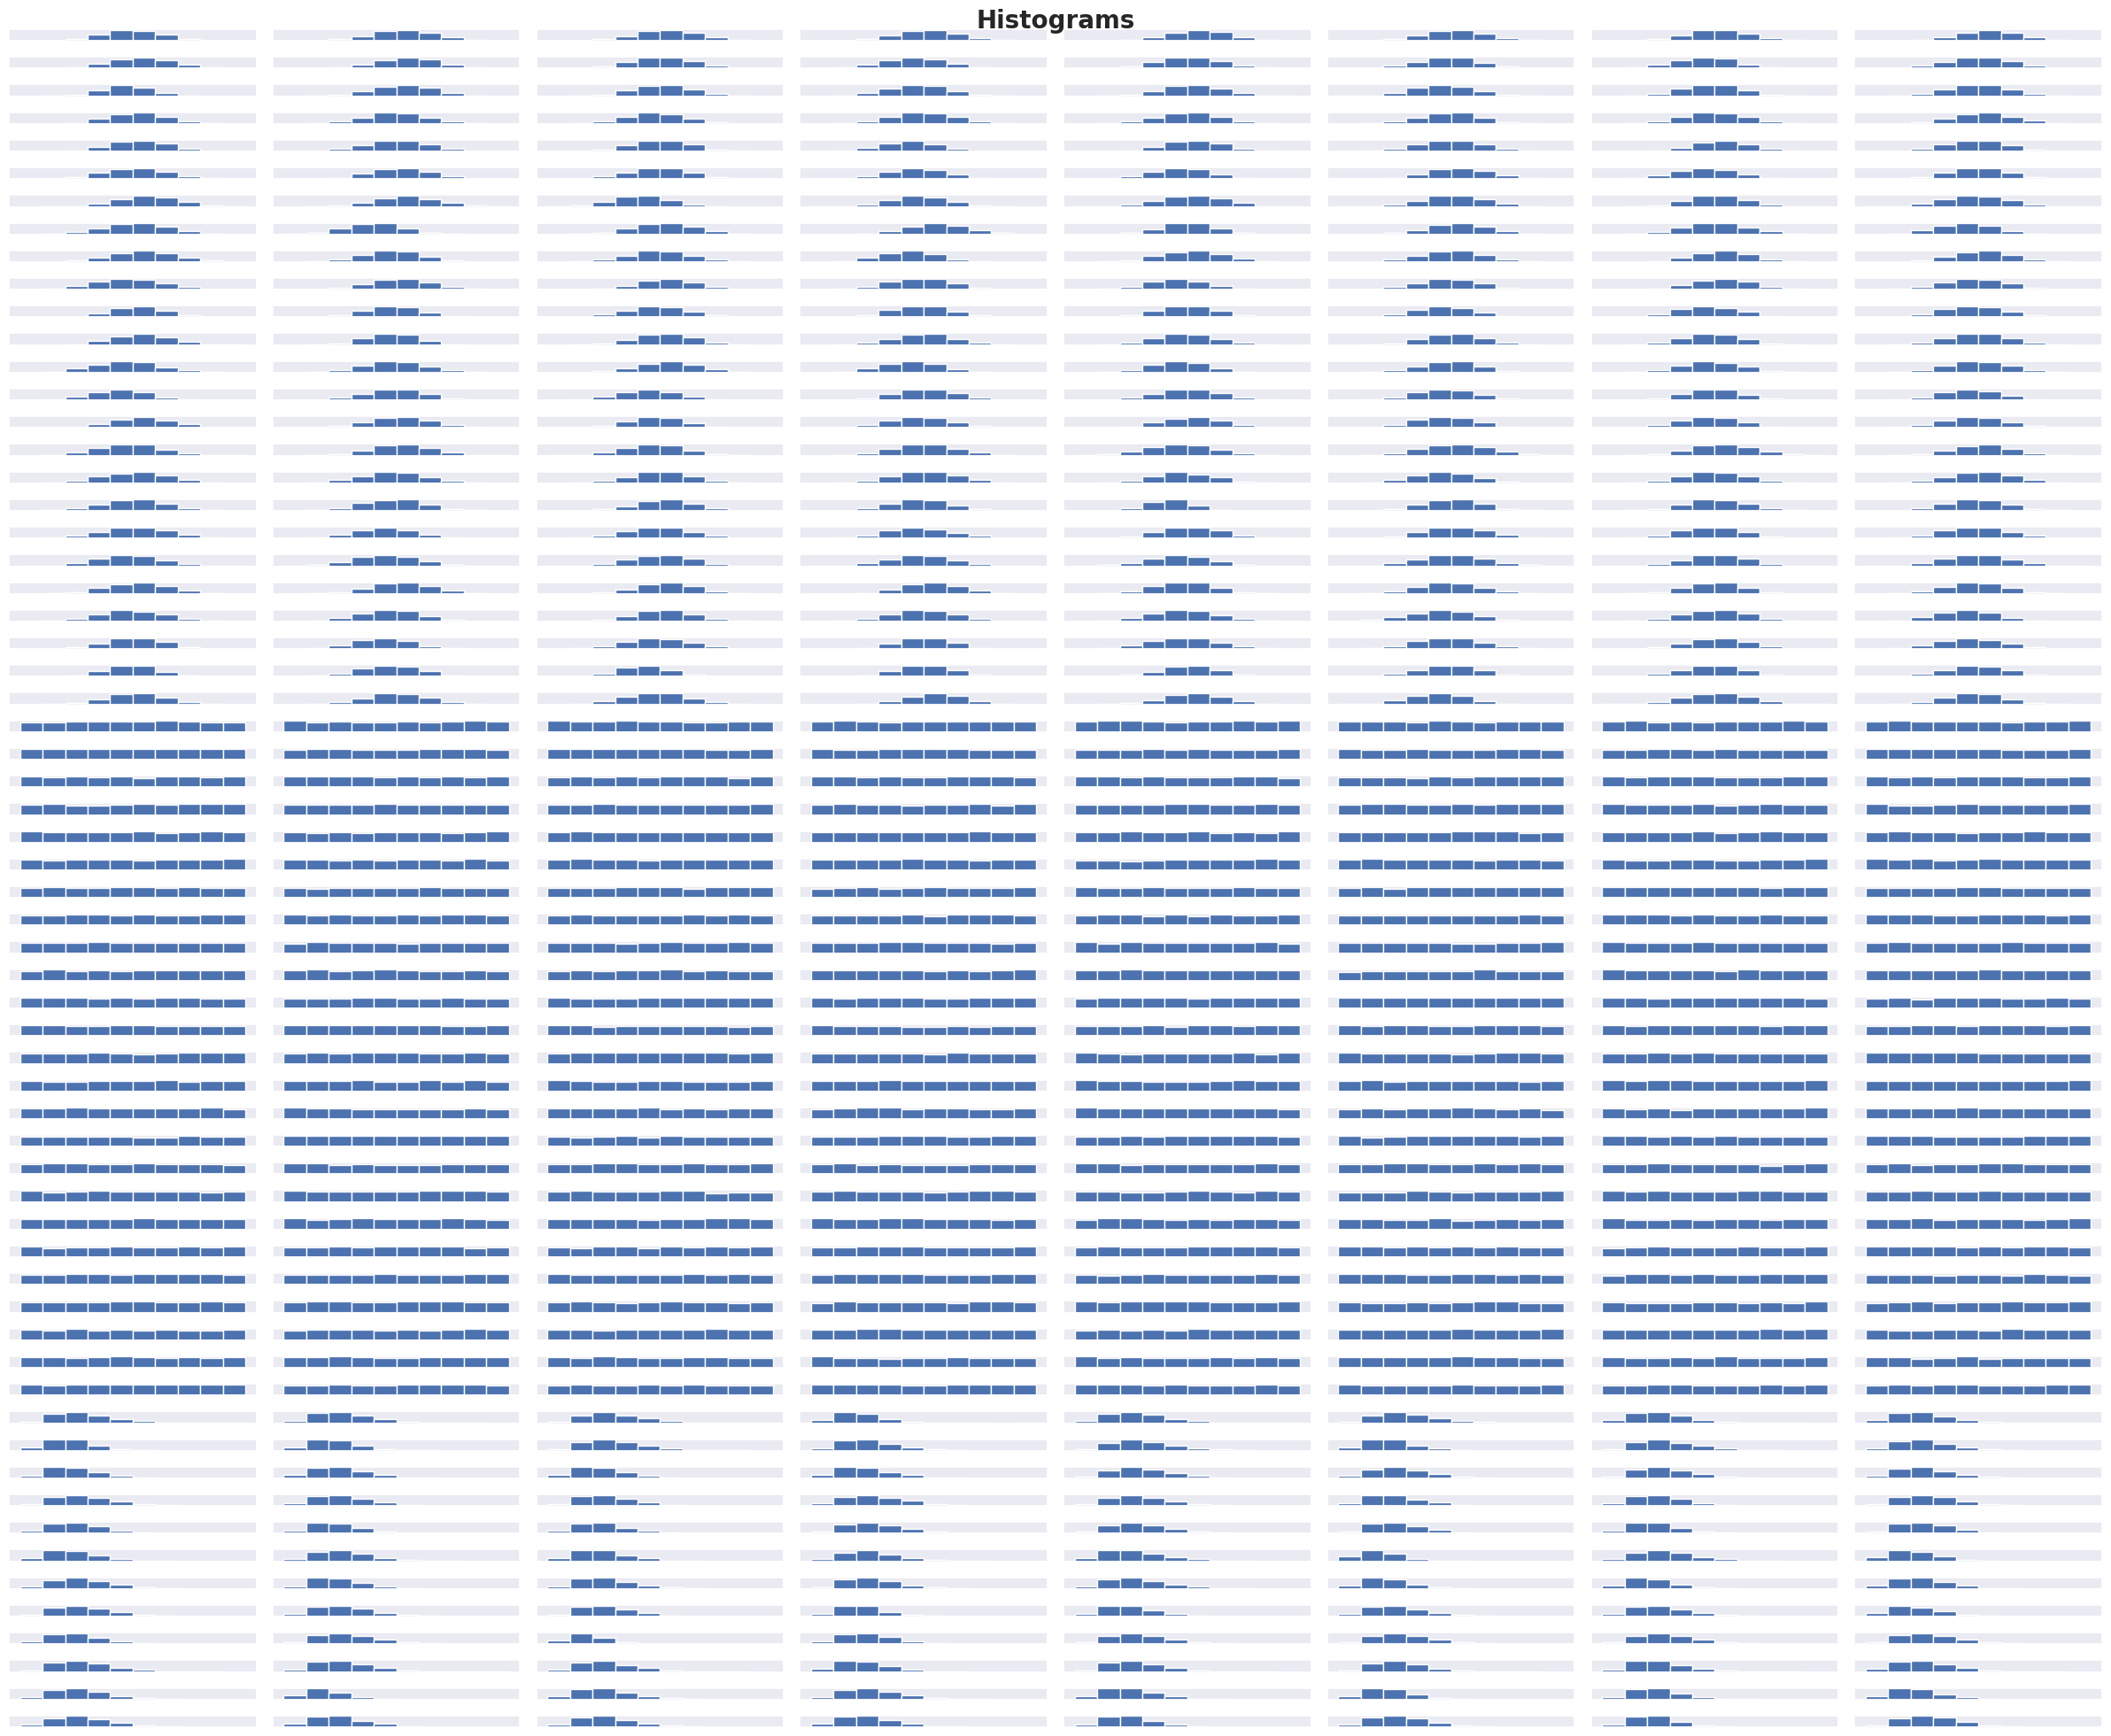

In [24]:
fig, ax = plt.subplots(62, 8, figsize = (24, 20))
k = 0
for i in range(62):
  for j in range(8):
    ax[i,j].hist(X[:, k])
    ax[i,j].set_yticks([])
    ax[i,j].set_xticks([])
    k += 1
plt.suptitle("Histograms", fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()

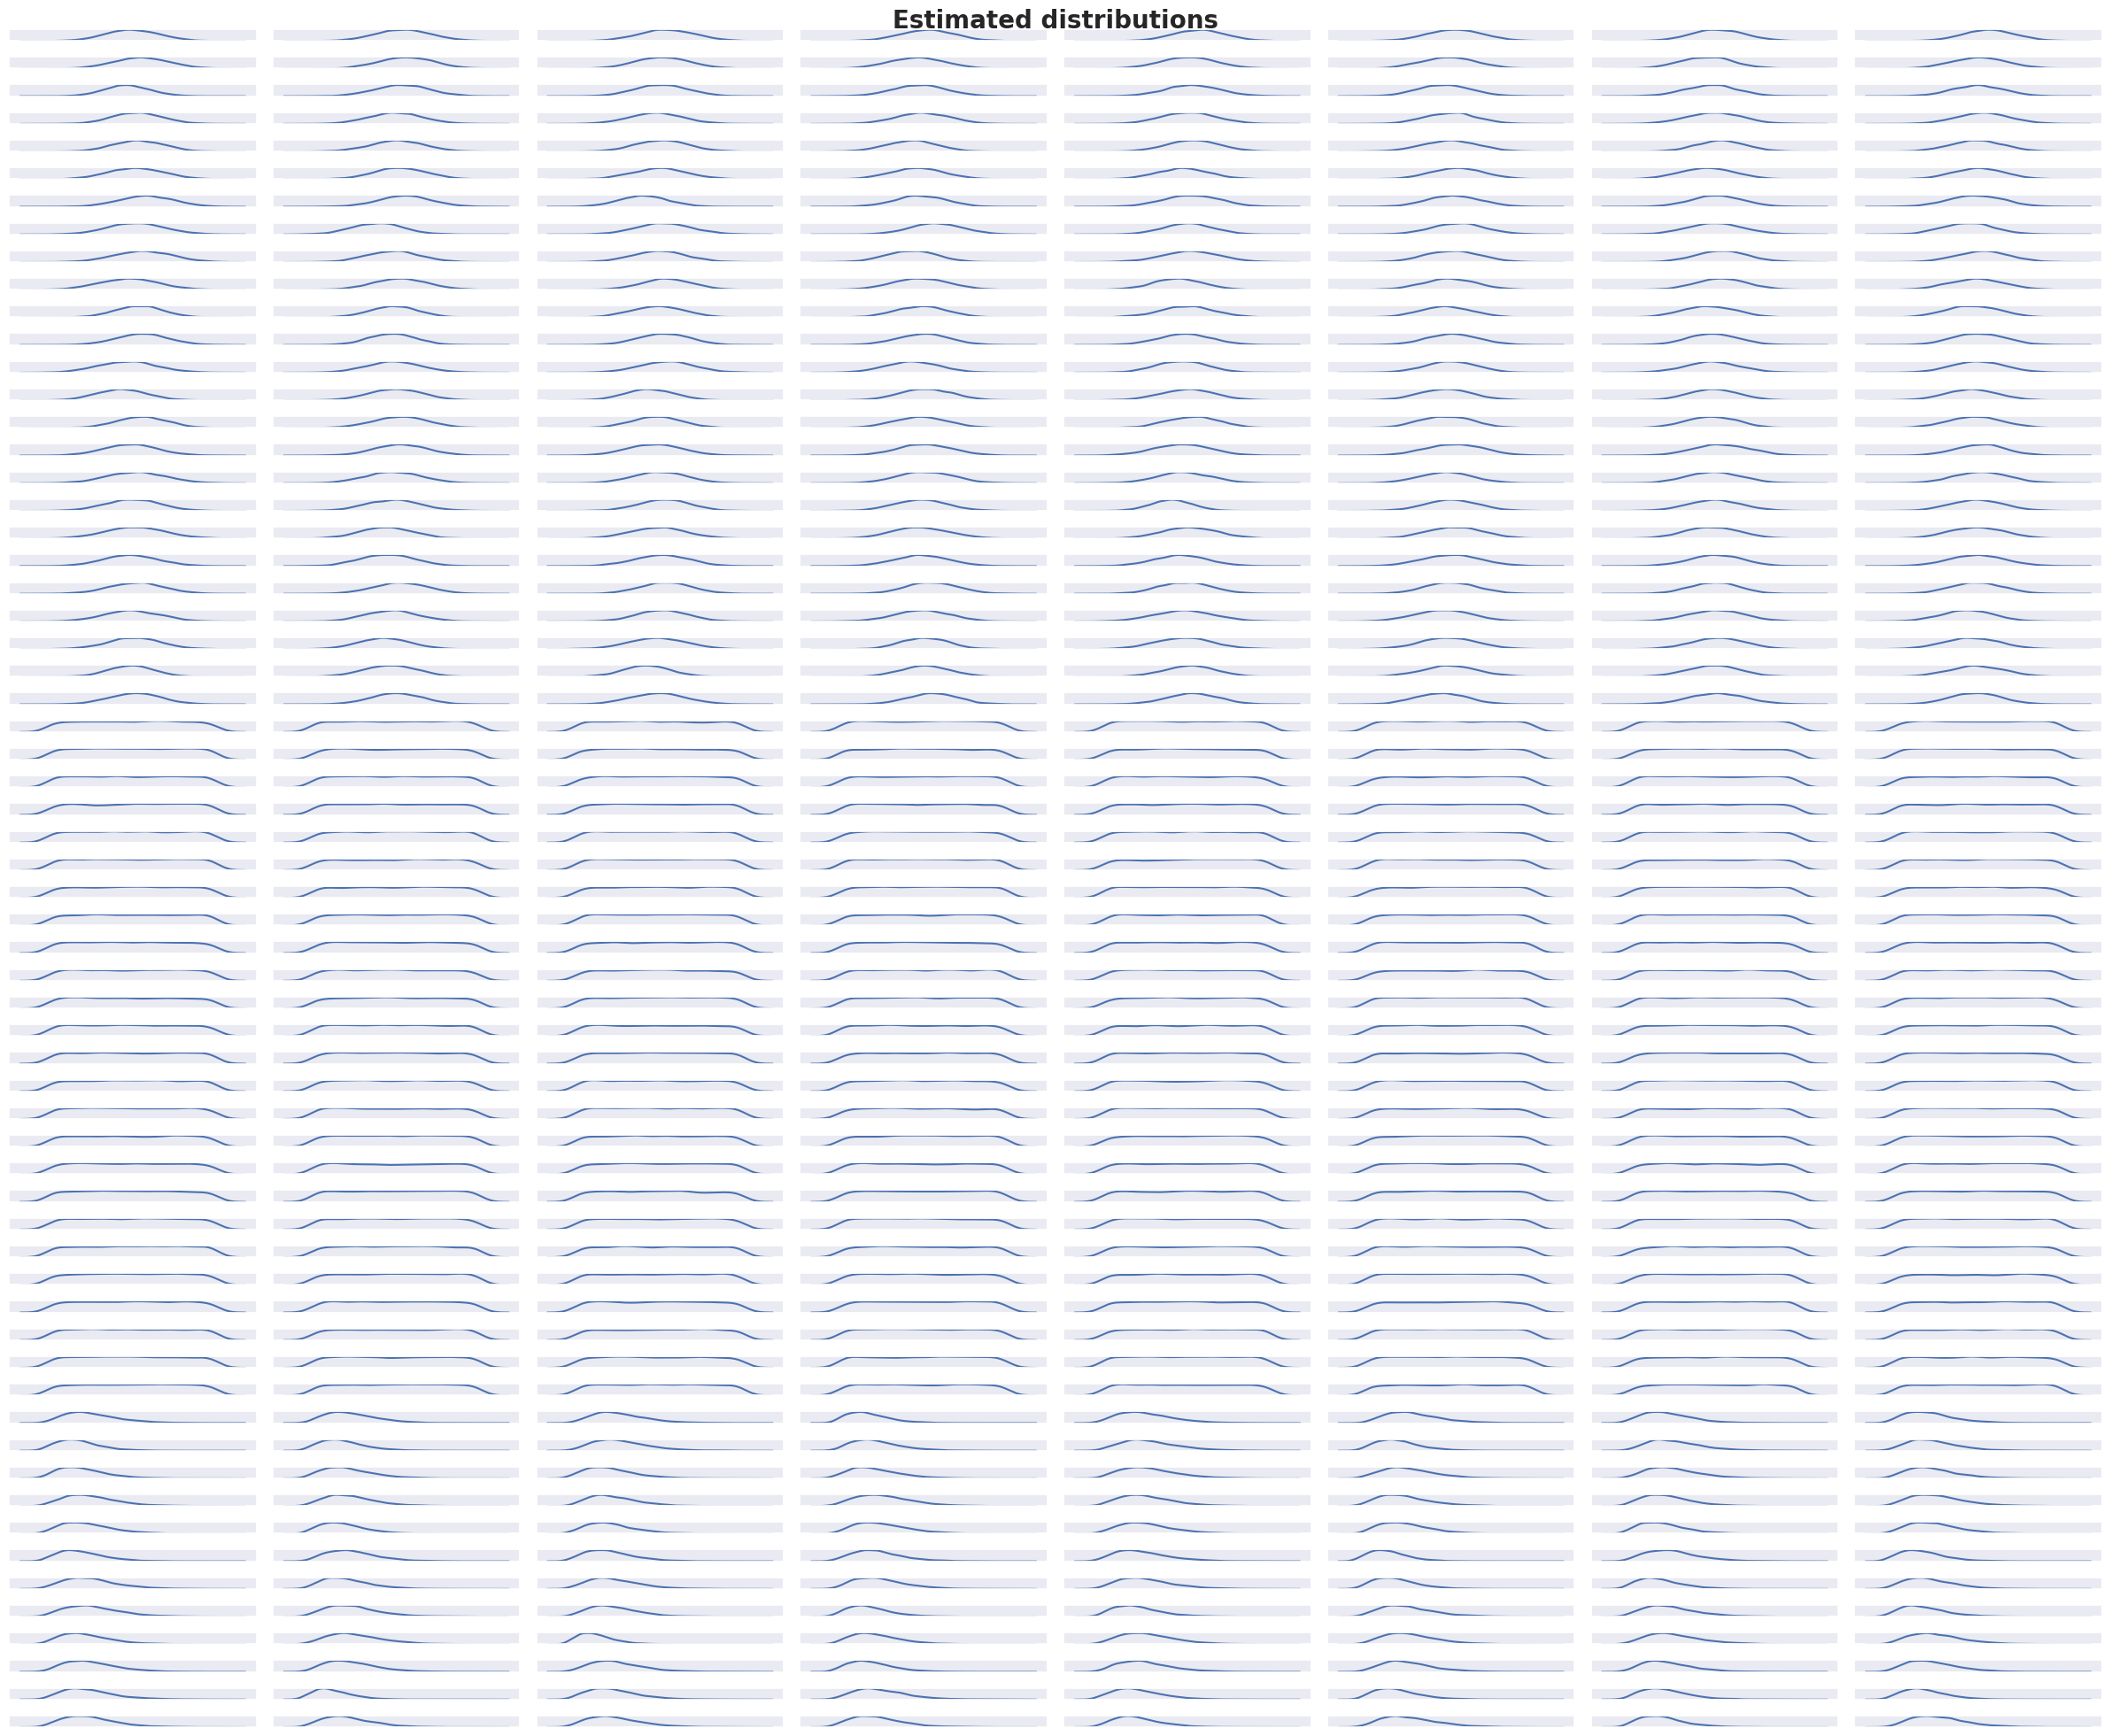

In [20]:
fig, ax = plt.subplots(62, 8, figsize = (24, 20))
k = 0
for i in range(62):
  for j in range(8):
    sns.kdeplot(X[:, k], ax=ax[i, j])
    ax[i,j].set_yticks([])
    ax[i,j].set_xticks([])
    ax[i,j].set_xlabel('')
    ax[i,j].set_ylabel('')
    k += 1
plt.suptitle("Estimated distributions", fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig("distributions.png")
plt.show()


In [27]:
files.download("histograms.png")
files.download("distributions.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>